<a href="https://colab.research.google.com/github/wozzin/AI_ML/blob/main/Linear_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Classifier (선형분류)

- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)
> ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b > 0 <br>
> Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교

- 이진 선형 분류기는 선, 평면, 초평면을 이용하여 2개의 클래스를 구분하는 분류기


경사하강법(Gradient Descent) 최적화 알고리즘을 사용하여 선형 모델을 작성

[SGDClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

```
SGDClassifier(alpha, average, class_weight, epsilon, eta0, fit_intercept, l1_ratio, learning_rat, loss, max_iter, n_iter, n_jobs, penalty, power_t, random_state, shuffle, tol, verbose, warm_start)
```
확률적 경사하강법(SGD, Stochastic Gradient Descent)을 이용하여 선형모델을 구현

- lossstr : 손실함수 (default='hinge')
- penalty : {'l2', 'l1', 'elasticnet'}, default='l2'
- alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)
- max_iter : 계산에 사용할 작업 수 (default=1000)
- tol : 정밀도
- shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)
- epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- random_state : 난수 seed 설정
- learning_rate : 학습속도 (default='optimal')
- eta0 : 초기 학습속도 (default=0.0)
- power_t : 역 스케일링 학습률 (default=0.5)
- early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)
- validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)
- n_iter_no_change : 조기중지 전 반복횟수 (default=5)
- class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None
- warm_start : 초기화 유무 (default=False)
- average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()
iris.data.shape
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X = iris.data
y = iris.target
# 꽃받침의 길이와 넒이
iris.feature_names
X2 = X[:, :2]
X2[:5]


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

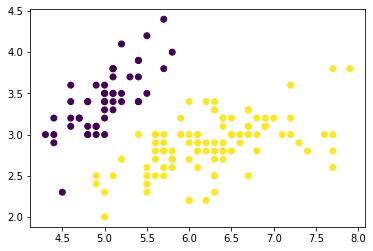

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X2[:,0], X2[:, 1], c=y2)

In [18]:
# y 값 중 2 값에 대한 변환방법 > boolean 사용
y2 = y.copy()
y2[y2 == 2] = 1
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2,
                                                    test_size=0.5,
                                                    random_state=0)
X_train.shape

(75, 2)

In [29]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000, random_state=0) #max_iter = epoch 값
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([[ 107.75047259, -153.43415249]]), array([-96.16214183]))

In [30]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9866666666666667, 1.0)

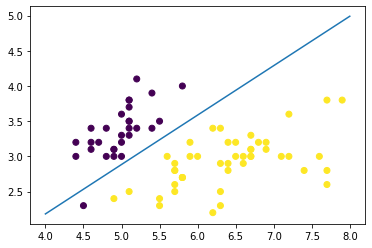

In [44]:
import numpy as np

w0 = model.coef_[0, 0]
w1 = model.coef_[0, 1]
b = model.intercept_
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train)
x0 = np.linspace(4, 8, 50)
x1 = -(w0 * x0 +b) / w1
plt.plot(x0, x1)

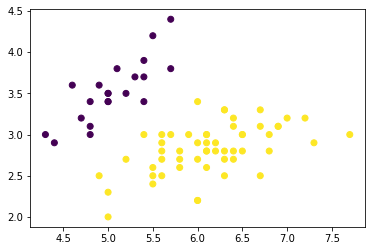

In [33]:
plt.scatter(X_test[:,0], X_test[:, 1], c=y_test)

In [47]:
# 4개속성 모두이용
# 3가지 꽃 구분
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9714285714285714, 0.9333333333333333)

In [48]:
model.coef_, model.intercept_

(array([[  12.11072664,   24.79815456,  -47.86620531,  -18.4544406 ],
        [  40.00964088, -114.96746204,   29.40467583,  -99.78308026],
        [-134.21181064,  -98.0966325 ,  202.04978038,  146.90092728]]),
 array([   9.84206645,  109.22635115, -102.37117645]))

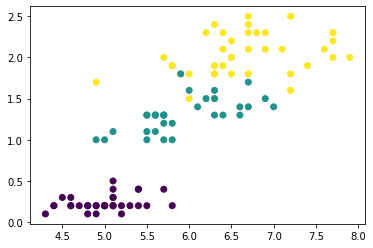

In [58]:
plt.scatter(X_train[:,0], X_train[:, 3], c=y_train)

In [80]:
# seaborn 적용
import seaborn as sns


In [81]:
iris = sns.load_dataset("iris")

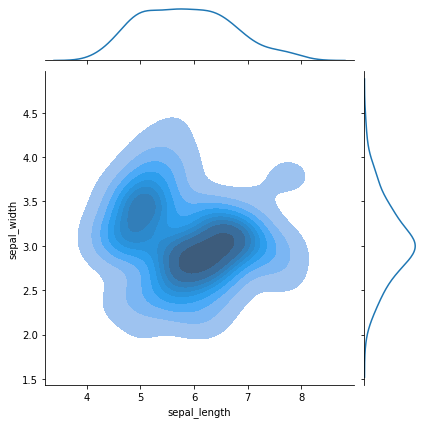

In [86]:
sns.jointplot(x = "sepal_length", y = "sepal_width", data = iris, kind='kde', shade=True)
plt.show()